In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#loading the data
df_1975 = pd.read_csv('CRICKET WORLD CUP - 1975 .csv')
df_1979 = pd.read_csv('CRICKET WORLD CUP - 1979.csv')
df_1983 = pd.read_csv('CRICKET WORLD CUP - 1983.csv')
df_1987 = pd.read_csv('CRICKET WORLD CUP - 1987.csv')
df_1992 = pd.read_csv('CRICKET WORLD CUP - 1992.csv')
df_1996 = pd.read_csv('CRICKET WORLD CUP - 1996.csv')
df_1999 = pd.read_csv('CRICKET WORLD CUP - 1999.csv')
df_2003 = pd.read_csv('CRICKET WORLD CUP - 2003.csv')
df_2007 = pd.read_csv('CRICKET WORLD CUP - 2007.csv')
df_2011 = pd.read_csv('CRICKET WORLD CUP - 2011.csv')
df_2015 = pd.read_csv('CRICKET WORLD CUP - 2015.csv')
df_2019 = pd.read_csv('CRICKET WORLD CUP - 2019.csv')


In [12]:
#combining the data
df = pd.concat([df_1975,df_1979,df_1983,df_1987,df_1992,df_1996,df_1999,df_2003,df_2007,df_2011,df_2015,df_2019])
print(df.columns)
df.head(10)

Index(['YEAR', 'TEAM', 'RUNS SCORED', 'WICKETS LOST', 'WICKETS TAKEN',
       'AGAINST', 'RESULT', 'VENUE', 'WINNER', 'WINNER '],
      dtype='object')


,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN,AGAINST,RESULT,VENUE,WINNER,WINNER
0,NaN,AUS,278.0,7.0,10.0,PAK,WON,LEEDS,WEST INDIES,NaN
1,1975.0,AUS,328.0,5.0,4.0,SL,WON,LONDON,NaN,NaN
2,NaN,AUS,192.0,10.0,3.0,WI,LOST,LONDON,NaN,NaN
3,NaN,AUS,94.0,6.0,10.0,ENG,WON,LEEDS,NaN,NaN
4,NaN,AUS,274.0,10.0,8.0,WI,LOST,LONDON,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,ENG,334.0,4.0,3.0,IND,WON,LONDON,NaN,NaN
7,NaN,ENG,266.0,6.0,10.0,NZ,WON,NOTTHINGHAM,NaN,NaN
8,NaN,ENG,290.0,5.0,10.0,EA,WON,BIRMINGHAM,NaN,NaN
9,NaN,ENG,93.0,10.0,6.0,AUS,LOST,LEEDS,NaN,NaN


In [13]:
#dropping useless columns
df = df.drop(['YEAR'], axis=1)
df = df.drop('WINNER', axis=1)
df = df.drop('WINNER ', axis=1)
df.head(7)

,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN,AGAINST,RESULT,VENUE
0,AUS,278.0,7.0,10.0,PAK,WON,LEEDS
1,AUS,328.0,5.0,4.0,SL,WON,LONDON
2,AUS,192.0,10.0,3.0,WI,LOST,LONDON
3,AUS,94.0,6.0,10.0,ENG,WON,LEEDS
4,AUS,274.0,10.0,8.0,WI,LOST,LONDON
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ENG,334.0,4.0,3.0,IND,WON,LONDON


In [14]:
#dropping null rows
df= df.dropna()
#dropping rows with invalid runs NR and tie games
df = df[df['RUNS SCORED'] != 'NR']
df = df[df['RESULT'] != 'NR']
df = df[df['RESULT'] != 'TIE']
df = df[df['RESULT'] != 'TIED']
df.head(7)

,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN,AGAINST,RESULT,VENUE
0,AUS,278.0,7.0,10.0,PAK,WON,LEEDS
1,AUS,328.0,5.0,4.0,SL,WON,LONDON
2,AUS,192.0,10.0,3.0,WI,LOST,LONDON
3,AUS,94.0,6.0,10.0,ENG,WON,LEEDS
4,AUS,274.0,10.0,8.0,WI,LOST,LONDON
6,ENG,334.0,4.0,3.0,IND,WON,LONDON
7,ENG,266.0,6.0,10.0,NZ,WON,NOTTHINGHAM


In [15]:
#printing about dataset
df.info()
df.describe()
#converting runs scored to float
df['RUNS SCORED'] = pd.to_numeric(df['RUNS SCORED'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 105
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TEAM           865 non-null    object
 1   RUNS SCORED    865 non-null    object
 2   WICKETS LOST   865 non-null    object
 3   WICKETS TAKEN  865 non-null    object
 4   AGAINST        865 non-null    object
 5   RESULT         865 non-null    object
 6   VENUE          865 non-null    object
dtypes: object(7)
memory usage: 54.1+ KB


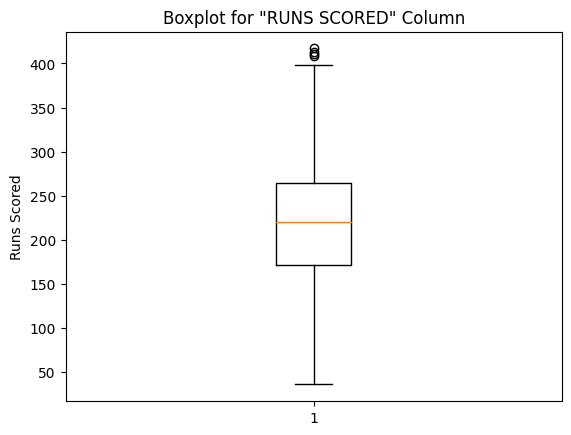

In [16]:
# check for outliers with boxplot
plt.boxplot(df['RUNS SCORED'])
plt.title('Boxplot for "RUNS SCORED" Column')
plt.ylabel('Runs Scored')
plt.show()

In [17]:
#remove the outliers with IQR method
# Calculate the IQR (Interquartile Range)
Q1 = df['RUNS SCORED'].quantile(0.25)
Q3 = df['RUNS SCORED'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows without outliers
df_no_outliers = df[(df['RUNS SCORED'] >= lower_bound) & (df['RUNS SCORED'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers)

DataFrame without outliers:
    TEAM  RUNS SCORED WICKETS LOST WICKETS TAKEN AGAINST RESULT        VENUE
0    AUS        278.0          7.0          10.0     PAK    WON        LEEDS
1    AUS        328.0          5.0           4.0      SL    WON       LONDON
2    AUS        192.0         10.0           3.0      WI   LOST       LONDON
3    AUS         94.0          6.0          10.0     ENG    WON        LEEDS
4    AUS        274.0         10.0           8.0      WI   LOST       LONDON
..   ...          ...          ...           ...     ...    ...          ...
101  IND        268.0            7            10      WI    WON  MANCHESTER 
102  IND        306.0            5             7     ENG    WON   BIRMINGHAM
103  IND        314.0            9            10     BAN    WON   BIRMINGHAM
104  IND        265.0            3             7      SL    WON        LEEDS
105  IND        221.0           10             8      NZ   LOST  MANCHESTER 

[861 rows x 7 columns]


In [18]:
print(df_no_outliers.VENUE.unique())

['LEEDS' 'LONDON' 'NOTTHINGHAM' 'BIRMINGHAM' 'MANCHESTER' 'NOTTINGHAM'
 'TAUNTON' 'BRISTOL' 'DERBY' 'SWANSEA' 'SOUTHAMPTON' 'CHELMSFORD'
 'LEICESTER' 'WORCESTER' 'TURNBRIDGE WELLS' 'HYDERABAD' 'RAWALPINDI'
 'LAHORE' ' KARACHI ' 'FAISALABAD' 'KARACHI' 'PESHAWAR' 'KANPUR ' 'PUNE'
 'GUJRANWALA' 'JAIPUR' 'MUMBAI' 'KOLKATA' 'CHENNAI' 'BENGALURU' 'DELHI'
 'AHMEDABAD' 'NAGPUR' 'INDORE' 'CHANDIGARH' 'CUTTACK ' 'AUCKLAND'
 'HAMILTON' 'NAPIER' 'DUNEDIN' 'WELLINGTON' 'CHRISTCHURCH' 'SYDNEY'
 'BRISBANE' 'ADELAIDE' 'PERTH' 'HOBART' 'MELBOURNE' 'BALLARAT' 'ALBURY'
 'NEW PLYMOUTH' 'BERRI' 'CANBERRA' 'VADODARA' 'GWALIOR' 'MOHALI' 'COLOMBO'
 'PATNA' 'KANPUR' 'KANDY' 'VISAKHAPATNAM' 'CUTTACK' 'LONODN' 'CANTERBURY'
 'NORTHAMPTON' 'BRIGHTON' 'AMSTELVEEN' 'CHESTER-LE-STREET' 'DUBLIN'
 'EDINBURGH' 'CARDIFF' 'CAPE TOWN' 'POTCHEFSTROOM' 'JOHANNESBERG'
 'BLOEMFONTEIN' 'EAST LONDON' 'GQEBERHA' 'CENTURION' 'KIMBERLEY' 'BENONI'
 'PIETERMARITZBURG' 'PAARI' 'NAIROBI' 'HARARE' 'BULAWAYO' 'DURBAN'
 'JAMAICA' 'ANTIGUA

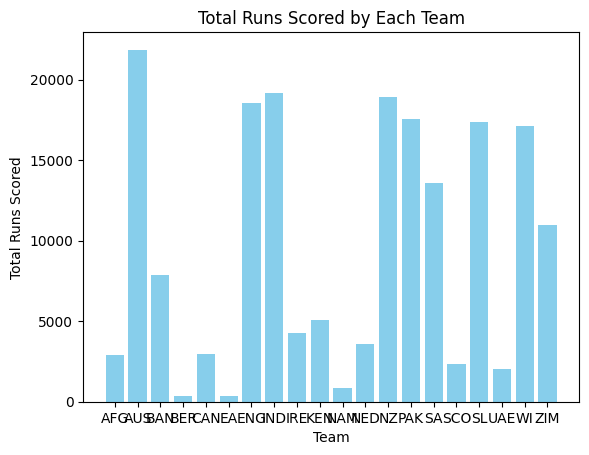

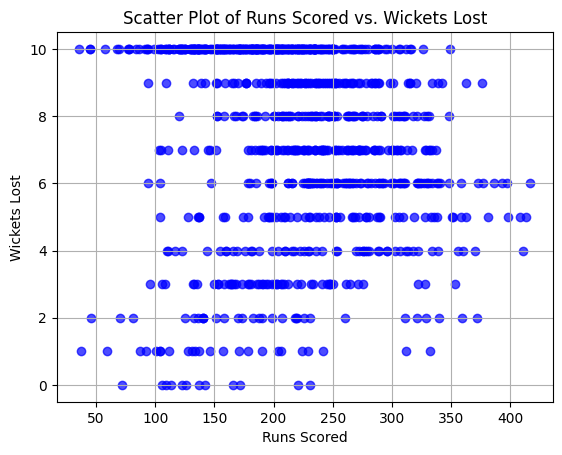

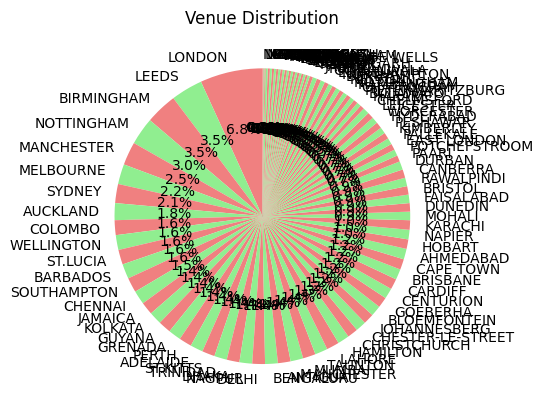

In [29]:
class Visualization:
  def __init__(self,xcolumn,ycolumn):
    self.xcol = xcolumn
    self.ycol = ycolumn

  def plotBar(self):
    team_runs = df_no_outliers.groupby(self.xcol)[self.ycol].sum().reset_index()
    # Plotting the bar chart
    plt.bar(team_runs[self.xcol], team_runs[self.ycol], color='skyblue')
    plt.xlabel('Team')
    plt.ylabel('Total Runs Scored')
    plt.title('Total Runs Scored by Each Team')
    plt.show()

  def plotScatter(self):
    plt.scatter(df[self.xcol], df[self.ycol], color='blue', alpha=0.7)
    plt.xlabel('Runs Scored')
    plt.ylabel('Wickets Lost')
    plt.title('Scatter Plot of Runs Scored vs. Wickets Lost')
    plt.grid(True)
    plt.show()

  def plotPie(self):
    result_counts = df[self.xcol].value_counts()
    # Plotting the pie chart
    plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
    plt.title('Venue Distribution')
    plt.show()

visobj1 = Visualization("TEAM","RUNS SCORED")
visobj1.plotBar()

visobj2 = Visualization("RUNS SCORED","WICKETS LOST")
visobj2.plotScatter()

visobj3 = Visualization("VENUE","")
visobj3.plotPie()



In [34]:
import sqlite3
try:
  sqliteconnection= sqlite3.connect('sample5.db')
  sqlite_create_table_query=''' CREATE TABLE MATCH (id INTEGER PRIMARY KEY,
  TEAM TEXT NOT NULL,
  AGAINST text NOT NULL,
  RUNS_SCORED INTEGER NOT NULL,
  WICKETS_LOST INTEGER NOT NULL,
  WICKETS_TAKEN INTEGER NOT NULL,
  RESULT TEXT NOT NULL,
  VENUE TEXT NOT NULL);'''
  cursor=sqliteconnection.cursor()
  print ("successfully connected")
  cursor.execute(sqlite_create_table_query)
  sqliteconnection.commit()
  print("sqlite table created")
  cursor.close()
except sqlite3.Error as error:
  print("Error while creating",error)
finally:
  if sqliteconnection:
    sqliteconnection.close()
    print("sqlite connection is closed")


successfully connected
sqlite table created
sqlite connection is closed


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df_no_outliers' is your DataFrame
df_no_outliers['RESULT'] = df_no_outliers['RESULT'].map({'WON': 1, 'LOST': 0})

# Features (X) and target variable (y)
X = df_no_outliers[['TEAM', 'AGAINST', 'VENUE']]
y = df_no_outliers['RESULT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['TEAM', 'AGAINST', 'VENUE'])
    ],
    remainder='passthrough'
)

# Logistic Regression model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
clf.fit(X_train, y_train)

# Predictions on the test set
predictions = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("CLassification report")
print(classification_report(y_test,predictions))


Accuracy: 0.7011494252873564
CLassification report
              precision    recall  f1-score   support

           0       0.70      0.63      0.67        41
           1       0.70      0.76      0.73        46

    accuracy                           0.70        87
   macro avg       0.70      0.70      0.70        87
weighted avg       0.70      0.70      0.70        87



<ipython-input-31-3f7bdb912efb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['RESULT'] = df_no_outliers['RESULT'].map({'WON': 1, 'LOST': 0})


In [154]:
#these values can be changed based on which countries are playing when we want to predict
new_data = pd.DataFrame({
    'TEAM': ['IND'],
    'AGAINST': ['AUS'],
    'VENUE': ['AHMEDABAD']
})
print(clf.predict(new_data)[0]) # 0 meaning india will lose and 1 meaning india will win

0


Text(0.5, 1.0, 'Confusion Matrix')

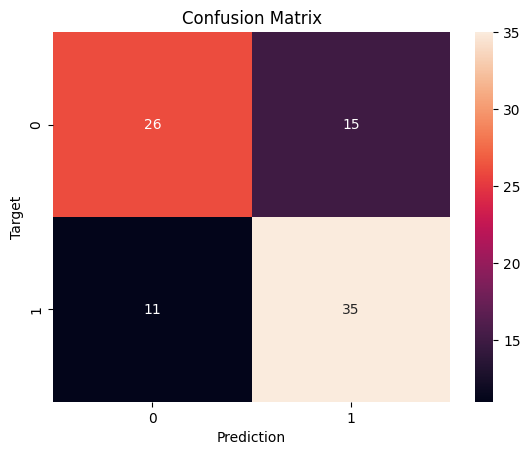

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test,predictions)
plt.figure()
sns.heatmap(cf,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')